<img src="logo_n.png" alt="Drawing" align="right" style="width: 150px;"/> <br> 12 de enero de 2022 <br> Ana Gómez <br> <b> BioinfoGRX</b> presenta: 



# <font color='DarkCyan'>Introducción a PANDAS</font>

* <font color='CornflowerBlue'>Importación del paquete y creación de un data frame</font>  

* <font color='CornflowerBlue'>Exploración del data frame</font>  

* <font color='CornflowerBlue'>Manipulación del data frame</font>  

* <font color='CornflowerBlue'>Exportación e importación de ficheros</font> 

* <font color='CornflowerBlue'>Gráficos simples</font> 

## <font color='CornflowerBlue'>Importación del paquete y creación de un data frame</font>  

In [85]:
import pandas as pd

In [86]:
data = {'Species':['A', 'C', 'C', 'A', 'B', 'A', 'B', 'B', 'C', 'B'], # 3 species: A, B, C
        'Gender':['M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M'], # M:male; F:female
       'Size':[12.8, 11.4, 10.3, 14.1, 11, 12.2, 13.1, 9.8, 11.5, 9.9]} # cm

print(type(data))

<class 'dict'>


In [87]:
df = pd.DataFrame(data, index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])  
df 

,Species,Gender,Size
1,A,M,12.8
2,C,F,11.4
3,C,M,10.3
4,A,M,14.1
5,B,F,11.0
6,A,F,12.2
7,B,M,13.1
8,B,M,9.8
9,C,F,11.5
10,B,M,9.9


## <font color='CornflowerBlue'>Exploración del data frame</font>  

In [88]:
df.shape

(10, 3)

In [89]:
df.dtypes

Species     object
Gender      object
Size       float64
dtype: object

In [90]:
df.head(3)

,Species,Gender,Size
1,A,M,12.8
2,C,F,11.4
3,C,M,10.3


In [91]:
df.tail(3)

,Species,Gender,Size
8,B,M,9.8
9,C,F,11.5
10,B,M,9.9


In [92]:
df[0:2]

,Species,Gender,Size
1,A,M,12.8
2,C,F,11.4


.iloc — se busca por posición, mediante números o 'coordenadas'

.loc — se busca por etiquetas 

In [93]:
df.iloc[0:2]

,Species,Gender,Size
1,A,M,12.8
2,C,F,11.4


In [94]:
#df[0]
#df['1']

In [95]:
df.iloc[0] # primera fila

Species       A
Gender        M
Size       12.8
Name: 1, dtype: object

In [96]:
df.loc['1'] # fila con index '1'

Species       A
Gender        M
Size       12.8
Name: 1, dtype: object

In [97]:
df.loc['1', 'Size'] 

12.8

In [98]:
df.iloc[0,0] 

'A'

In [99]:
df.iloc[0,2] # primera fila, tercera columna

12.8

In [100]:
df['Species']

1     A
2     C
3     C
4     A
5     B
6     A
7     B
8     B
9     C
10    B
Name: Species, dtype: object

In [101]:
df.isna()

,Species,Gender,Size
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False


In [102]:
df.isna().sum()

Species    0
Gender     0
Size       0
dtype: int64

In [103]:
df.min()

Species      A
Gender       F
Size       9.8
dtype: object

In [104]:
df.max()

Species       C
Gender        M
Size       14.1
dtype: object

In [105]:
df.mean()

Size    11.61
dtype: float64

## <font color='CornflowerBlue'>Manipulación del data frame</font>   

In [106]:
df['Size_x3'] = df['Size'] * 3
df

,Species,Gender,Size,Size_x3
1,A,M,12.8,38.4
2,C,F,11.4,34.2
3,C,M,10.3,30.9
4,A,M,14.1,42.3
5,B,F,11.0,33.0
6,A,F,12.2,36.6
7,B,M,13.1,39.3
8,B,M,9.8,29.4
9,C,F,11.5,34.5
10,B,M,9.9,29.7


In [107]:
groups_sp = df.groupby(['Species']).mean()
groups_sp

,Size,Size_x3
Species,,
A,13.033333,39.10
B,10.950000,32.85
C,11.066667,33.20


In [108]:
groups_g = df.groupby(['Gender']).mean()
groups_g

,Size,Size_x3
Gender,,
F,11.525000,34.575
M,11.666667,35.000


In [109]:
groups_sp_g = df.groupby(['Species','Gender']).mean()
groups_sp_g

Size  Size_x3
Species Gender                    
A       F       12.200000    36.60
        M       13.450000    40.35
B       F       11.000000    33.00
        M       10.933333    32.80
C       F       11.450000    34.35
        M       10.300000    30.90

In [110]:
import numpy as np
df.loc['8', 'Size'] = np.NaN

In [111]:
df.iloc[6:9,:] # list index includes 0

,Species,Gender,Size,Size_x3
7,B,M,13.1,39.3
8,B,M,NaN,29.4
9,C,F,11.5,34.5


In [112]:
pd.DataFrame(data)

,Species,Gender,Size
0,A,M,12.8
1,C,F,11.4
2,C,M,10.3
3,A,M,14.1
4,B,F,11.0
5,A,F,12.2
6,B,M,13.1
7,B,M,9.8
8,C,F,11.5
9,B,M,9.9


In [113]:
df.insert(2, "Y", list(range(100, 110)), True)
df

,Species,Gender,Y,Size,Size_x3
1,A,M,100,12.8,38.4
2,C,F,101,11.4,34.2
3,C,M,102,10.3,30.9
4,A,M,103,14.1,42.3
5,B,F,104,11.0,33.0
6,A,F,105,12.2,36.6
7,B,M,106,13.1,39.3
8,B,M,107,NaN,29.4
9,C,F,108,11.5,34.5
10,B,M,109,9.9,29.7


In [114]:
new_row = {'Species':'X', 'Gender':'F', 'Y':110, 'Size':10, 'Size_x3':30}
df = df.append(new_row, ignore_index=True)
df

,Species,Gender,Y,Size,Size_x3
0,A,M,100,12.8,38.4
1,C,F,101,11.4,34.2
2,C,M,102,10.3,30.9
3,A,M,103,14.1,42.3
4,B,F,104,11.0,33.0
5,A,F,105,12.2,36.6
6,B,M,106,13.1,39.3
7,B,M,107,NaN,29.4
8,C,F,108,11.5,34.5
9,B,M,109,9.9,29.7


In [115]:
df = df.drop(['Y'], axis=1)
df

,Species,Gender,Size,Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
7,B,M,NaN,29.4
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [116]:
df = df.drop([10], axis=0)
df

,Species,Gender,Size,Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
7,B,M,NaN,29.4
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [117]:
df = df.dropna()
df

,Species,Gender,Size,Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [118]:
df.shape

(9, 4)

In [119]:
df

,Species,Gender,Size,Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [120]:
df.rename(columns={'Species': 'Sp', 'Gender': 'G'})

,Sp,G,Size,Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [121]:
df.add_prefix('pref_')

,pref_Species,pref_Gender,pref_Size,pref_Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [122]:
df.add_suffix('_suf')

,Species_suf,Gender_suf,Size_suf,Size_x3_suf
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [123]:
df.set_axis(list(range(1,10)), axis=0, inplace=True)

In [124]:
df

,Species,Gender,Size,Size_x3
1,A,M,12.8,38.4
2,C,F,11.4,34.2
3,C,M,10.3,30.9
4,A,M,14.1,42.3
5,B,F,11.0,33.0
6,A,F,12.2,36.6
7,B,M,13.1,39.3
8,C,F,11.5,34.5
9,B,M,9.9,29.7


In [125]:
list_of_dictionaries = df.to_dict('records')
type(list_of_dictionaries)

list

In [126]:
list_of_dictionaries

[{'Species': 'A', 'Gender': 'M', 'Size': 12.8, 'Size_x3': 38.400000000000006},
 {'Species': 'C', 'Gender': 'F', 'Size': 11.4, 'Size_x3': 34.2},
 {'Species': 'C', 'Gender': 'M', 'Size': 10.3, 'Size_x3': 30.900000000000002},
 {'Species': 'A', 'Gender': 'M', 'Size': 14.1, 'Size_x3': 42.3},
 {'Species': 'B', 'Gender': 'F', 'Size': 11.0, 'Size_x3': 33.0},
 {'Species': 'A', 'Gender': 'F', 'Size': 12.2, 'Size_x3': 36.599999999999994},
 {'Species': 'B', 'Gender': 'M', 'Size': 13.1, 'Size_x3': 39.3},
 {'Species': 'C', 'Gender': 'F', 'Size': 11.5, 'Size_x3': 34.5},
 {'Species': 'B', 'Gender': 'M', 'Size': 9.9, 'Size_x3': 29.700000000000003}]

In [127]:
dictionary_of_dictionaries = df.to_dict('index')
type(dictionary_of_dictionaries)

dict

In [128]:
dictionary_of_dictionaries

{1: {'Species': 'A',
  'Gender': 'M',
  'Size': 12.8,
  'Size_x3': 38.400000000000006},
 2: {'Species': 'C', 'Gender': 'F', 'Size': 11.4, 'Size_x3': 34.2},
 3: {'Species': 'C',
  'Gender': 'M',
  'Size': 10.3,
  'Size_x3': 30.900000000000002},
 4: {'Species': 'A', 'Gender': 'M', 'Size': 14.1, 'Size_x3': 42.3},
 5: {'Species': 'B', 'Gender': 'F', 'Size': 11.0, 'Size_x3': 33.0},
 6: {'Species': 'A',
  'Gender': 'F',
  'Size': 12.2,
  'Size_x3': 36.599999999999994},
 7: {'Species': 'B', 'Gender': 'M', 'Size': 13.1, 'Size_x3': 39.3},
 8: {'Species': 'C', 'Gender': 'F', 'Size': 11.5, 'Size_x3': 34.5},
 9: {'Species': 'B',
  'Gender': 'M',
  'Size': 9.9,
  'Size_x3': 29.700000000000003}}

## <font color='CornflowerBlue'>Exportación e importación de ficheros</font>   

In [129]:
df.to_csv('test.csv',index=False)

In [130]:
df2 = pd.read_csv('test.csv')
df2

,Species,Gender,Size,Size_x3
0,A,M,12.8,38.4
1,C,F,11.4,34.2
2,C,M,10.3,30.9
3,A,M,14.1,42.3
4,B,F,11.0,33.0
5,A,F,12.2,36.6
6,B,M,13.1,39.3
7,C,F,11.5,34.5
8,B,M,9.9,29.7


## <font color='CornflowerBlue'>Gráficos simples</font>    

<AxesSubplot:title={'center':'Size'}, xlabel='[Species]'>

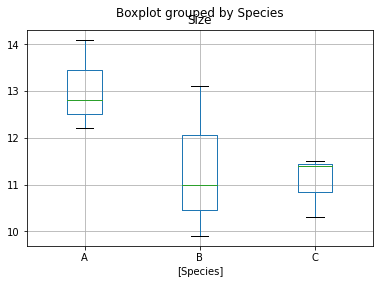

In [131]:
df.boxplot(column='Size', by=['Species'])

<AxesSubplot:title={'center':'Size'}, xlabel='[Species, Gender]'>

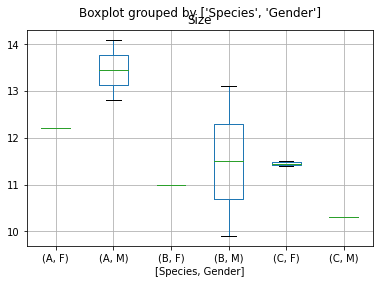

In [132]:
df.boxplot(column='Size', by=['Species', 'Gender'])